In [21]:
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os #システム操作系
from pathlib import Path #ファイル操作系
from createdatas3 import intensity, gaussian_beam
from scipy.optimize import curve_fit    # フィッティング用
from scipy.stats import norm

In [22]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '201211')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/201211


In [23]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [4]:
#2次元ガウスの式
def gaussian_beam_2d(X,a,b,c,d,e):
    x,y = X
    return  (a * np.exp(-2*((x-b)**2+(y-c)**2)/d**2) + e).flatten()

In [24]:
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

(200, 200)
(40000,)
現在時刻： 2020-12-11 20:54:27.322509


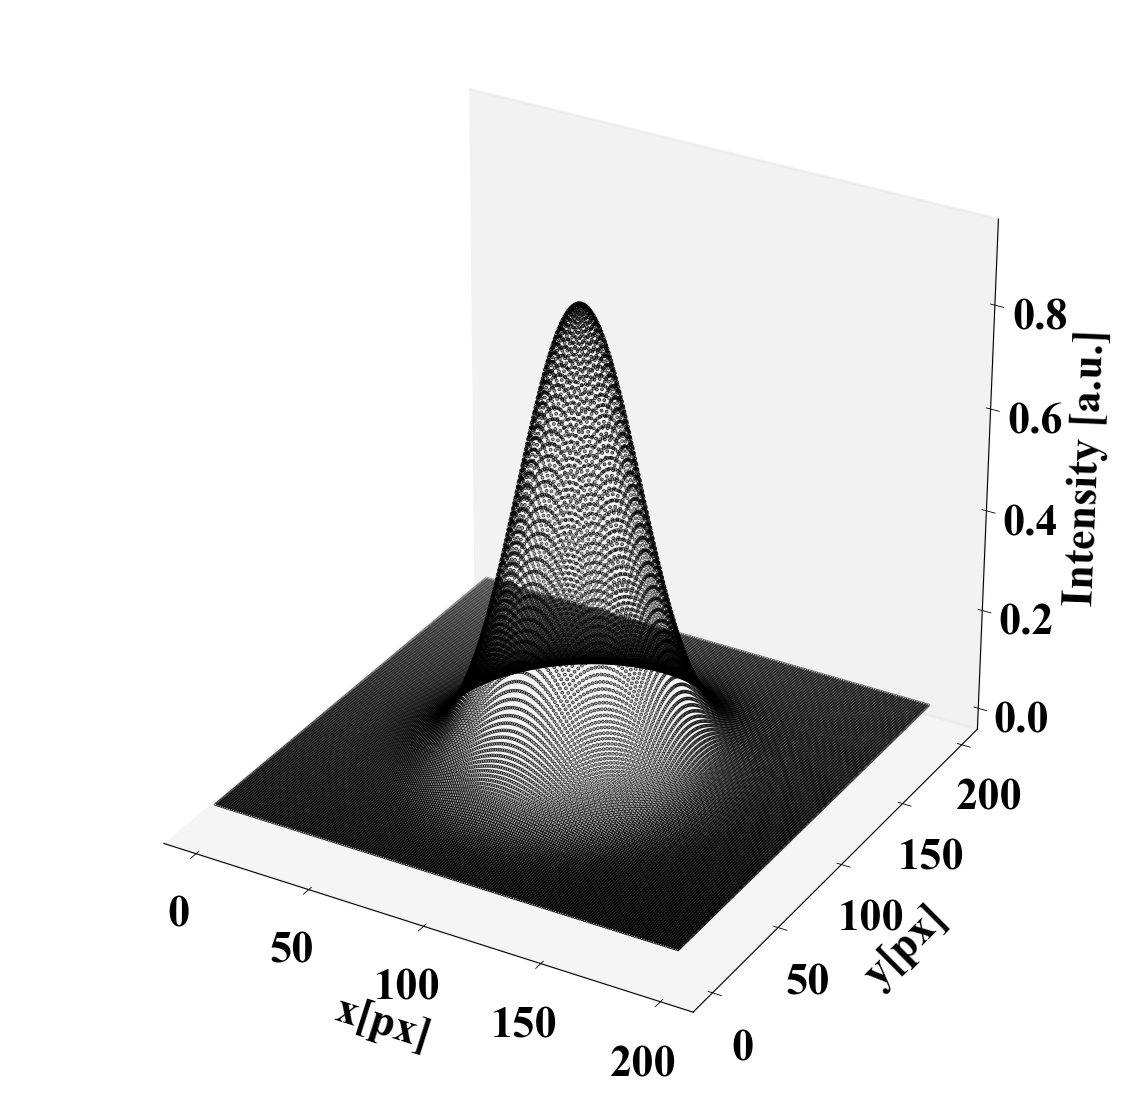

保存ファイル名： 2020-12-11_20-54_gaussian.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-54_gaussian.png


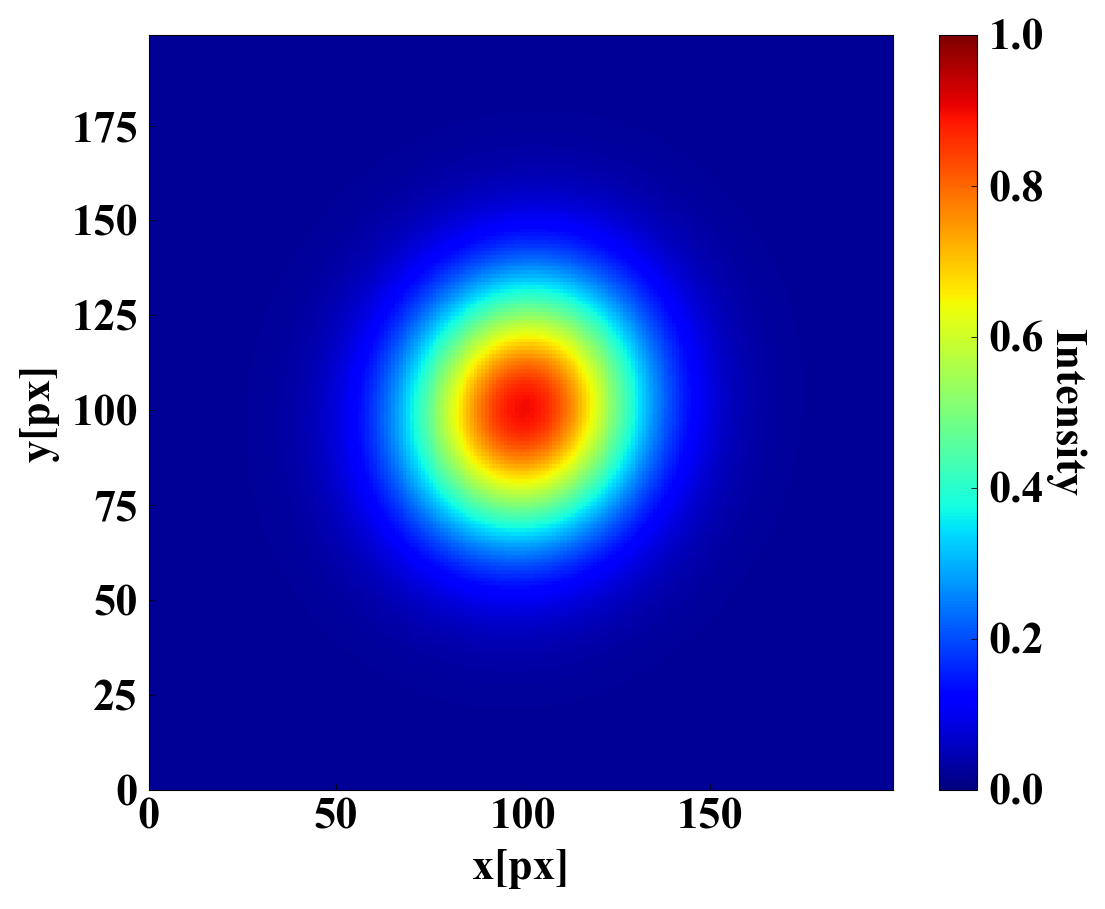

保存ファイル名： 2020-12-11_20-54_gaussian-jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-54_gaussian-jet.png


In [25]:
#中心座標
idx = np.array([100,100])
#フィッティングパラメータ
i0 = 0.878
b0 = 0.0578
x0 = idx[0]
y0 = idx[1]
wx = 43.8
wy = 46.5
h0 = 0.0207
size = 100
param = np.array([i0, b0, x0, y0, wx, wy, h0])  #初期値
x_array = np.arange(0, size*2, 1.0)                         # x配列
y_array = np.arange(0, size*2, 1.0)                         # y配列
nx = len(x_array)
ny = len(y_array)
x_grid, y_grid = np.meshgrid(x_array, y_array)
print(x_grid.shape)
#ガウスビーム
intensity = gaussian_beam_xy((x_grid.T, y_grid.T), *param)
print(intensity.shape)
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_gaussian.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#カラーマップ表示
intensity = intensity.reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_gaussian-jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, intensity, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Intensity", fontsize=16,rotation=270, labelpad = 15)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [6]:
#ノイズ強度の式
nx = len(x_array)
ny = len(y_array)
NOISE = (0.00844 * intensity.flatten() * (np.random.rand(nx*ny)-0.5))
NOISE_norm = (np.random.normal(loc=0,scale=intensity,size=nx*ny))

In [7]:
NOISE_50 = np.zeros((50, nx, ny))
intensity_noise50 = np.zeros((50, nx, ny))

print(intensity.shape)
for i in range(50):
    NOISE_50[i] = (0.00844 * intensity.flatten() * (np.random.rand(nx*ny)-0.5)+0.00165).reshape(nx,ny)
    intensity_noise50[i] = intensity + NOISE_50[i]

(200, 200)


In [26]:
NOISE_50_norm = np.zeros((50, nx, ny))
intensity_noise50_norm = np.zeros((50, nx, ny))
intensitys = np.tile(intensity,(1,1,50))
intensity = intensity.flatten()
NOISE_50_norm = NOISE_50_norm.reshape((50,nx*ny))
for k in range(nx*ny):
    NOISE_50_norm[:,k] = (np.random.normal(loc=0,scale=0.00844*intensity[k]+0.00165,size=50))
NOISE_50_norm = NOISE_50_norm.reshape(50,nx,ny)
intensity_noise50_norm = intensitys.reshape(50,nx,ny) + NOISE_50_norm.reshape(50,nx,ny)
print(intensity_noise50_norm.shape)

(50, 200, 200)


(0.0015380937855898908, 0.0022755697232822217)


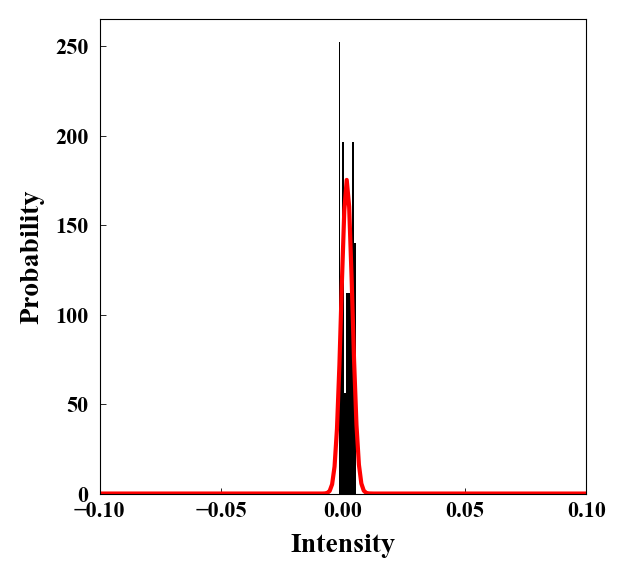

保存ファイル名： 2020-12-11_20-51_hist.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-51_hist.png


In [9]:
#最大値の座標のヒストグラム
hist = NOISE_50[:,idx[0],idx[1]]
#正規分布フィティング
param_ini = np.array([4, 0.0, 1.0])
x = np.linspace(-0.5,0.5, 1000)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
pdf = norm.pdf(x)

# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.plot(x, pdf_fitted, c='red')
plt.hist(hist, density=1, color='black')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.xlim(-0.1,0.1)
#plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

(50, 200, 200)
(0.0016147074449439172, 0.008789062913203619)


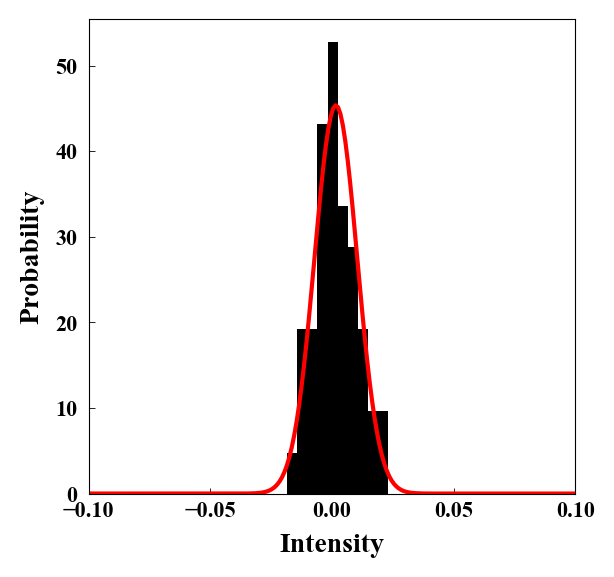

保存ファイル名： 2020-12-11_20-51_hist-norm.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-51_hist-norm.png


In [10]:
print(NOISE_50_norm.shape)
#最大値の座標のヒストグラム
hist = NOISE_50_norm[:,idx[0],idx[1]]
#正規分布フィティング
param_ini = np.array([4, 0.0, 1.0])
x = np.linspace(-0.5,0.5, 1000)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
pdf = norm.pdf(x)

# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist-norm.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.plot(x, pdf_fitted, c='red')
plt.hist(hist, density=1, color='black')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.xlim(-0.1,0.1)
plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [13]:
print((intensity.rshaape(nx,ny)[idx[0],idx[1]]).shape)

AttributeError: 'numpy.ndarray' object has no attribute 'rehsape'

(0.0014910223794419976, 0.00808525879067721)


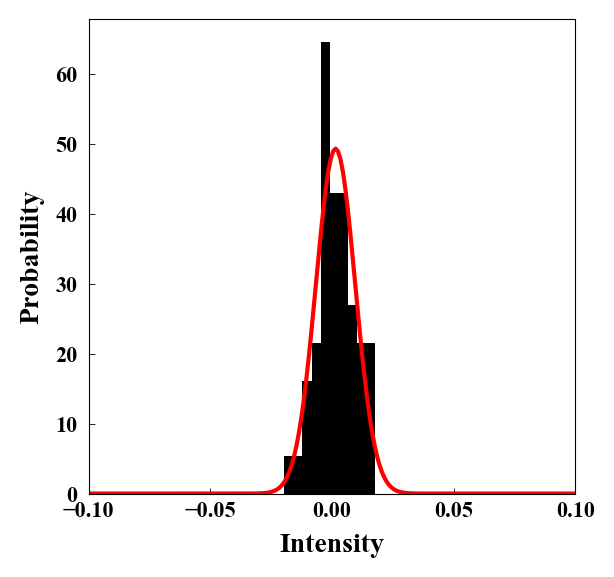

保存ファイル名： 2020-12-10_14-26_hist-norm.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/Create_gaussian/2020-12-10_14-26_hist-norm.png


In [19]:
hist = np.random.normal(loc=0,scale=0.00844*0.8987,size=50)+0.00165

#正規分布フィティング
param_ini = np.array([4, 0.0, 1.0])
x = np.linspace(-0.5,0.5, 1000)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
pdf = norm.pdf(x)

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist-norm.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.plot(x, pdf_fitted, c='red')
plt.hist(hist, density=1, color='black')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.xlim(-0.1,0.1)
plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

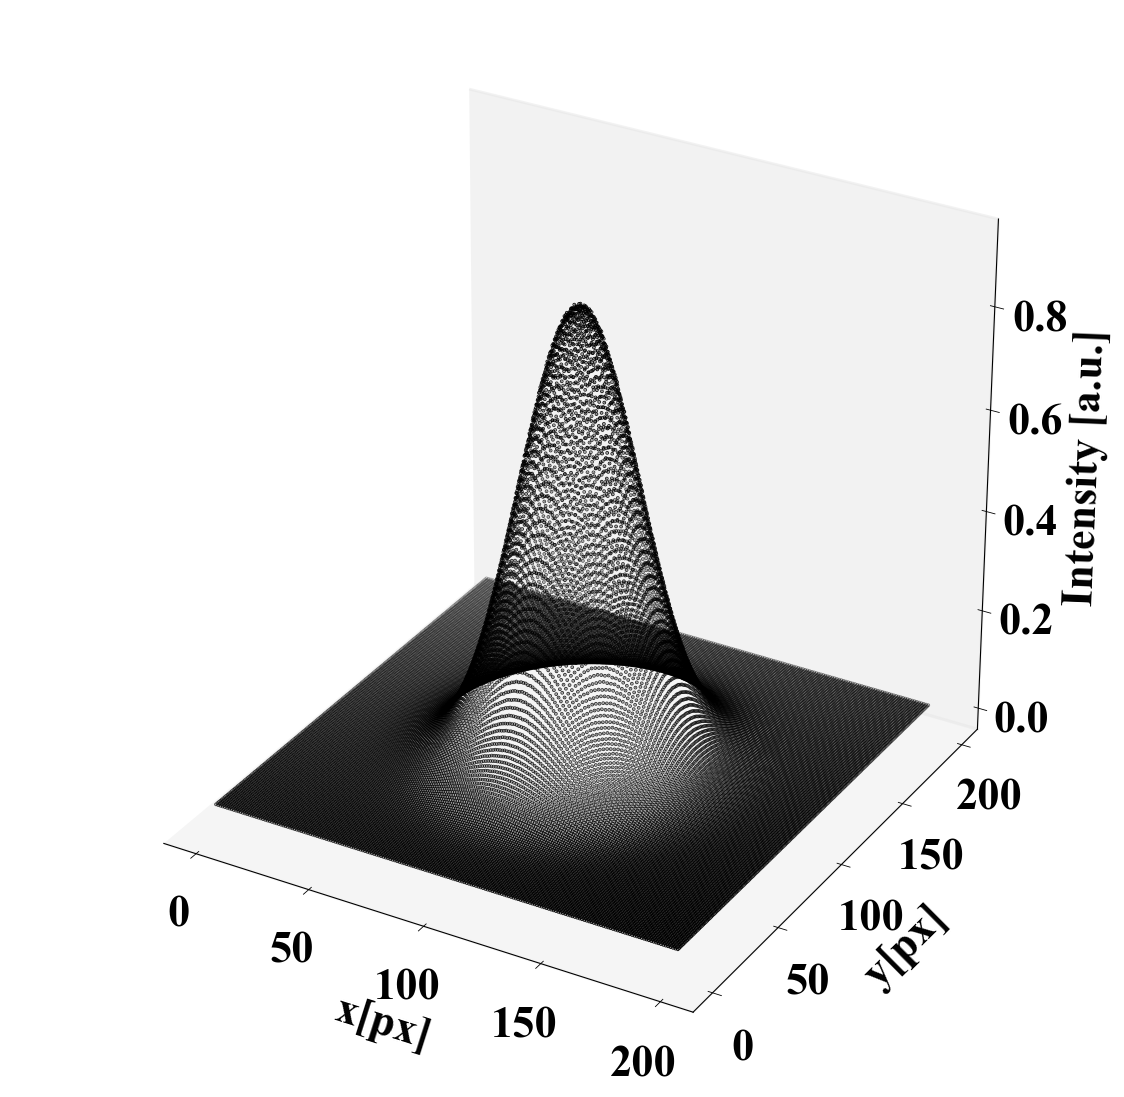

保存ファイル名： 2020-12-11_20-48_int+noise.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-48_int+noise.png


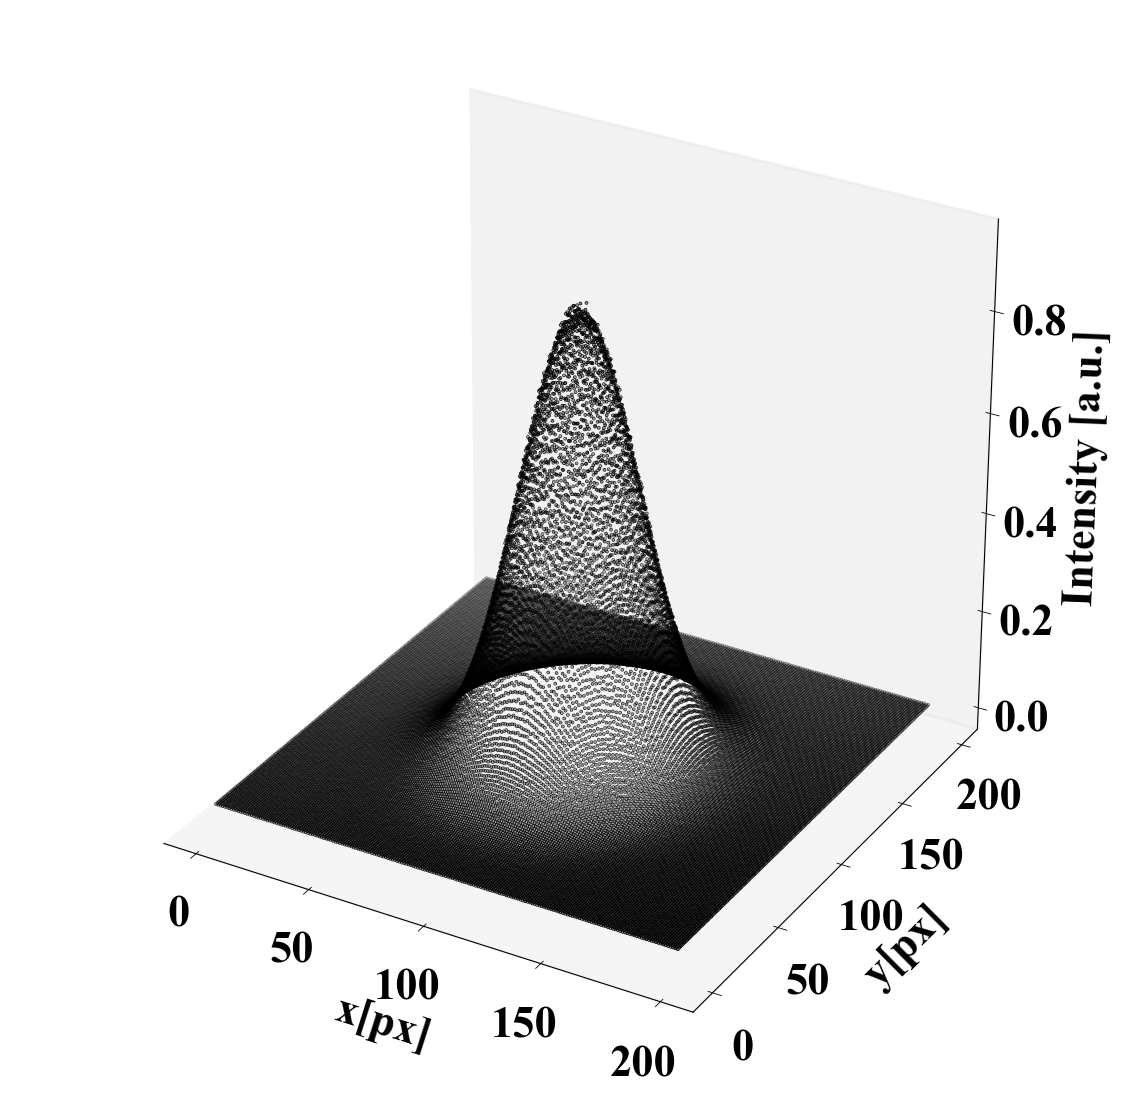

保存ファイル名： 2020-12-11_20-48_int+noise-norm.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-48_int+noise-norm.png


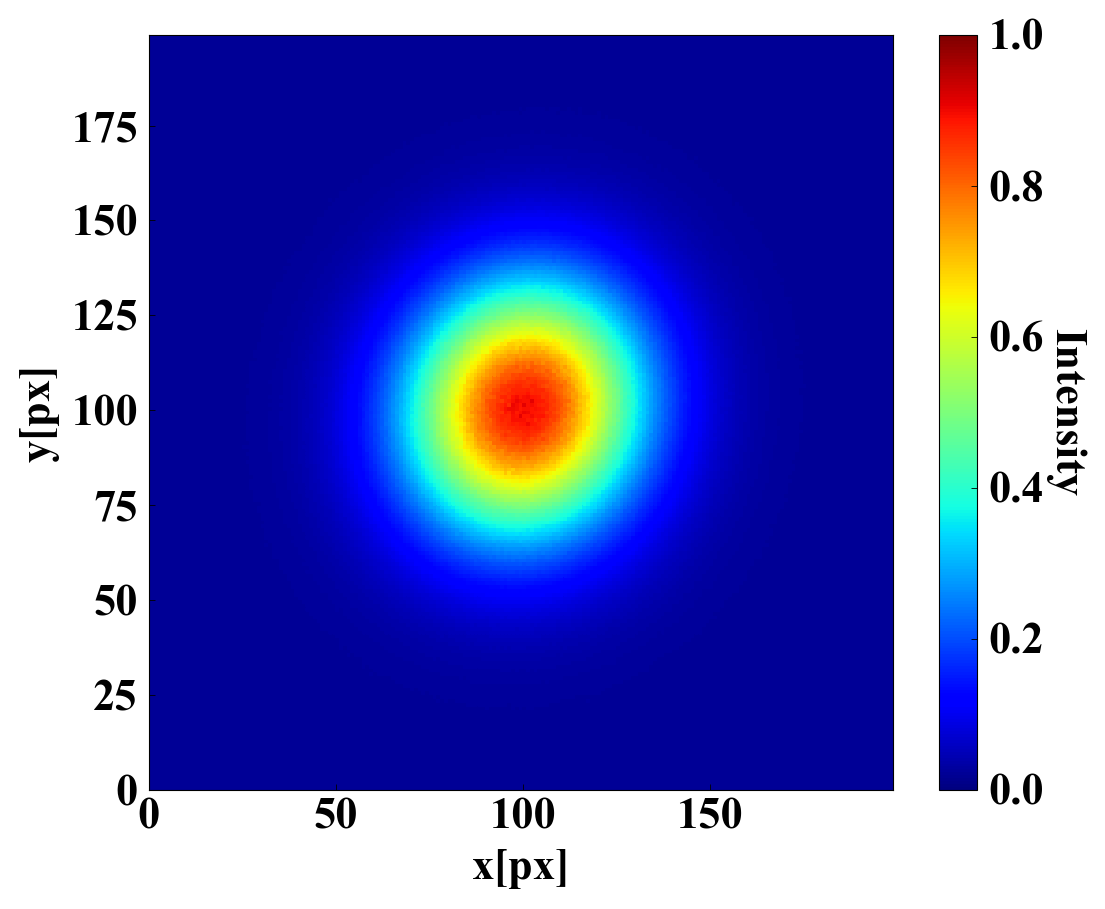

保存ファイル名： 2020-12-11_20-48_int+noise-norm_cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-48_int+noise-norm_cmap.png


In [37]:
intensity_noise = (intensity.flatten() + NOISE.flatten()).reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_int+noise.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity_noise, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

intensity_noise_norm = (intensity.flatten() + NOISE_norm.flatten()).reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_int+noise-norm.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity_noise_norm, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#カラーマップ表示
intensity = intensity.reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_int+noise-norm_cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, intensity_noise_norm, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Intensity", fontsize=16,rotation=270, labelpad = 15)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

(200, 200)


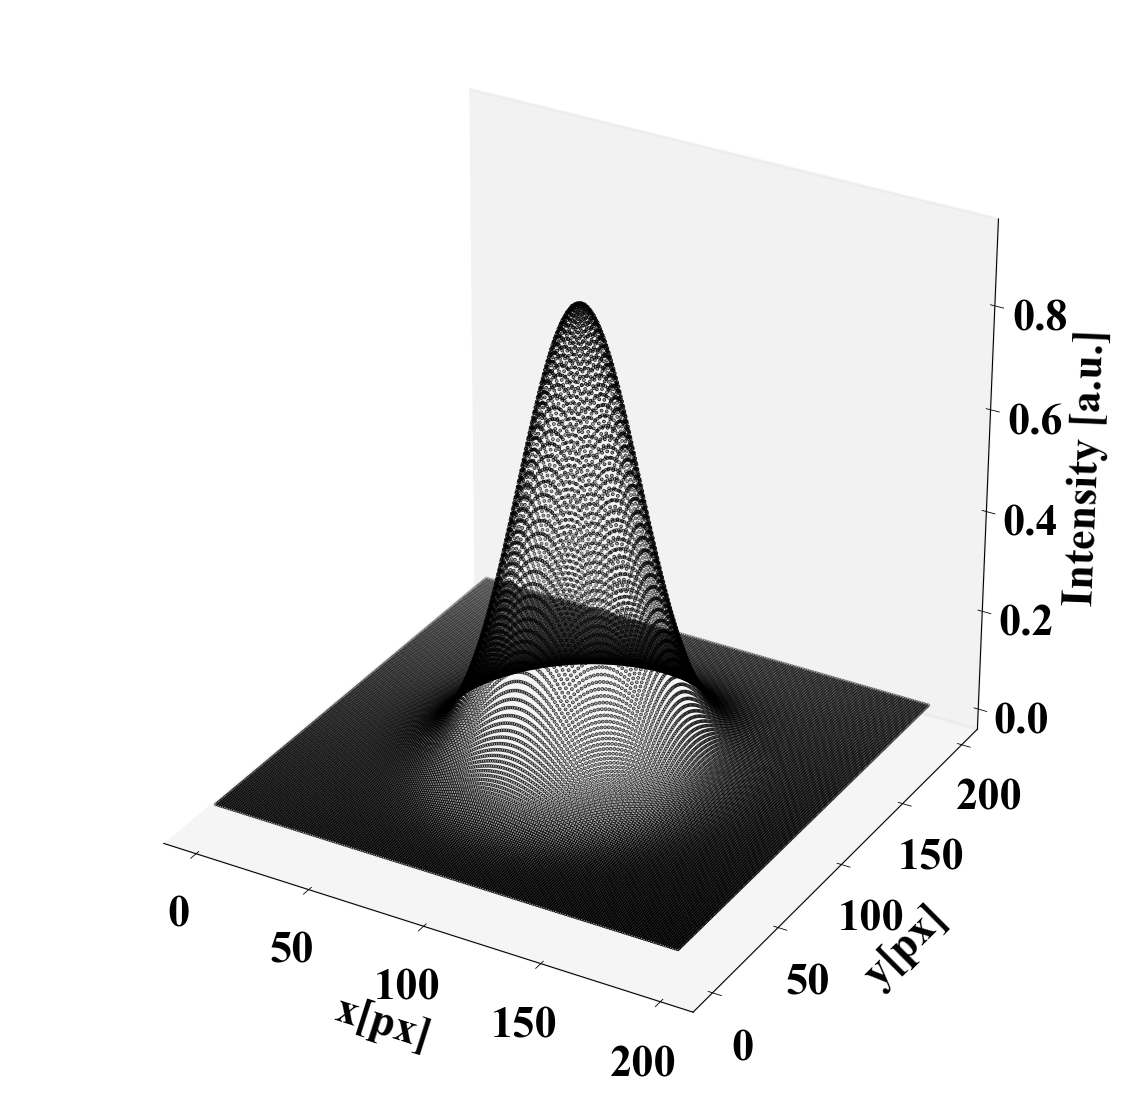

保存ファイル名： 2020-12-11_20-48_ave-50.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-48_ave-50.png


In [43]:
#50回精算
ave = np.average(intensity_noise50, axis=0)
print(ave.shape)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave-50.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, ave, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [39]:
intensity_noise50_norm.shape

(50, 200, 200)

(200, 200)


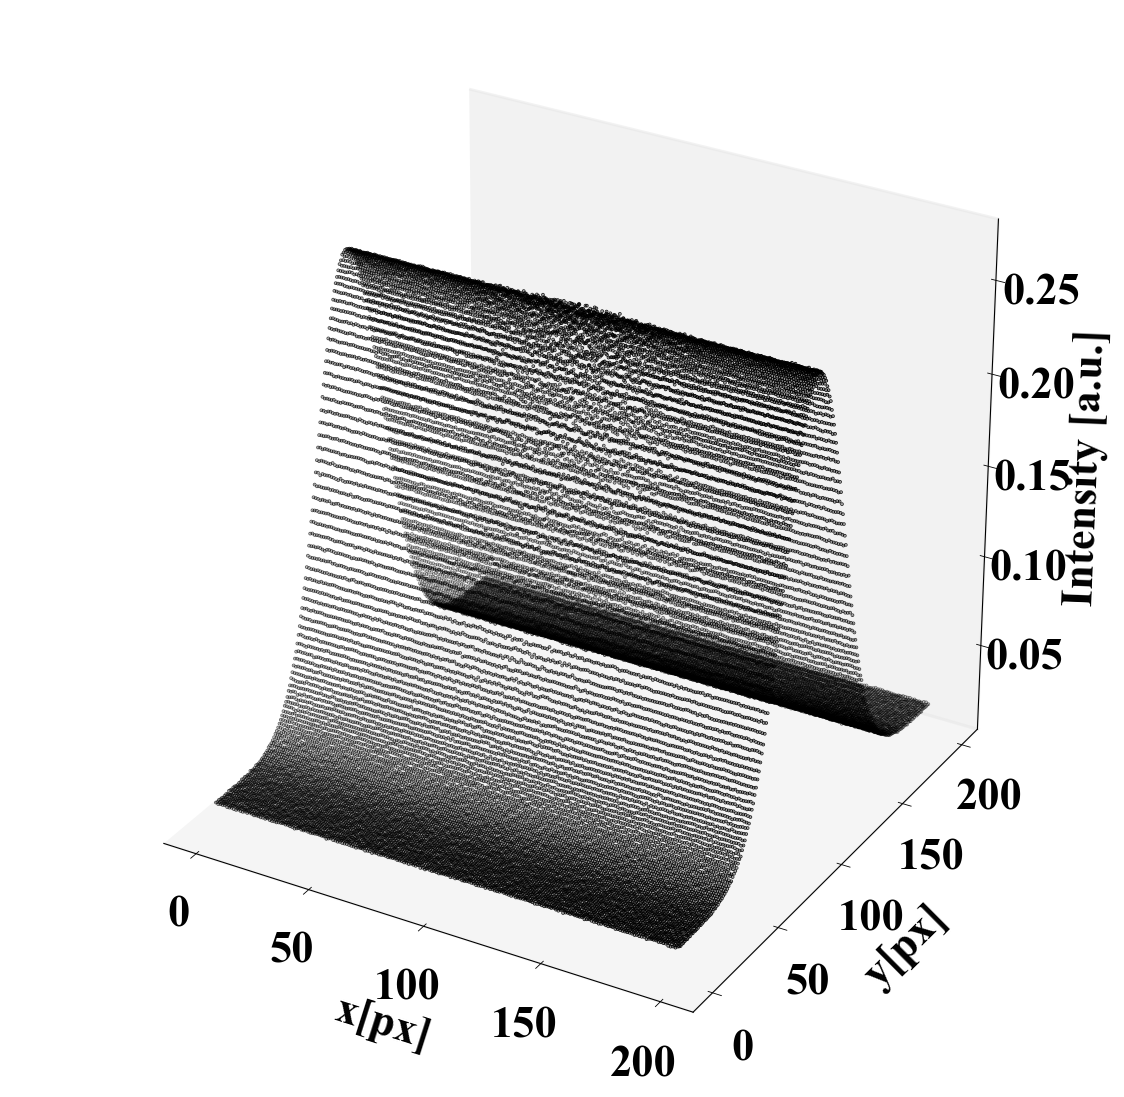

保存ファイル名： 2020-12-11_20-54_ave_norm-50.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-54_ave_norm-50.png


In [27]:
#50回精算norm
ave_norm = np.average(intensity_noise50_norm, axis=0)
print(ave_norm.shape)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave_norm-50.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, ave_norm, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [2]:
#初期パラメータ
idx_fit = np.unravel_index(np.argmax(ave_norm), ave_norm.shape)
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), ave_norm.flatten(), p0=param_ini, maxfev=2000)
intensity_fit = gaussian_beam_xy((x_grid.T, y_grid.T), *param)
#結果の表示
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_fit.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity_fit, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
print(param)

NameError: name 'np' is not defined

平均残差:0.001647221531109743±6.449760868311548e-05


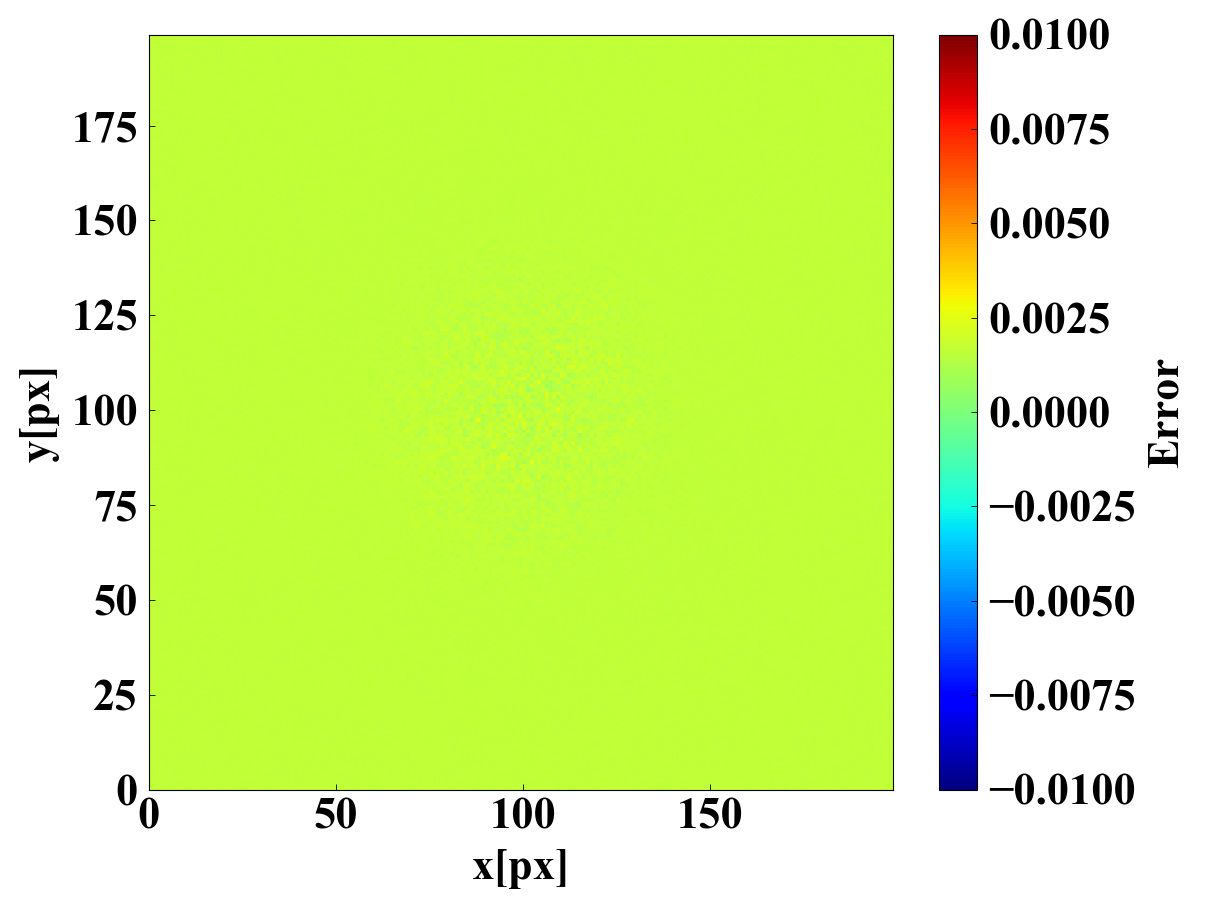

保存ファイル名： 2020-12-11_20-46_error-ave50cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/Create_gaussian/2020-12-11_20-46_error-ave50cmap.png


In [31]:
#残差の計算
error = (ave.flatten() - intensity_fit.flatten()).reshape(nx,ny)
std_noise = np.std(error)
ave_noise = np.average(error)
print(f'平均残差:{ave_noise}±{std_noise}')
#残差の表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error-ave50cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, error, cmap='jet', vmin=-0.01, vmax=0.01)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

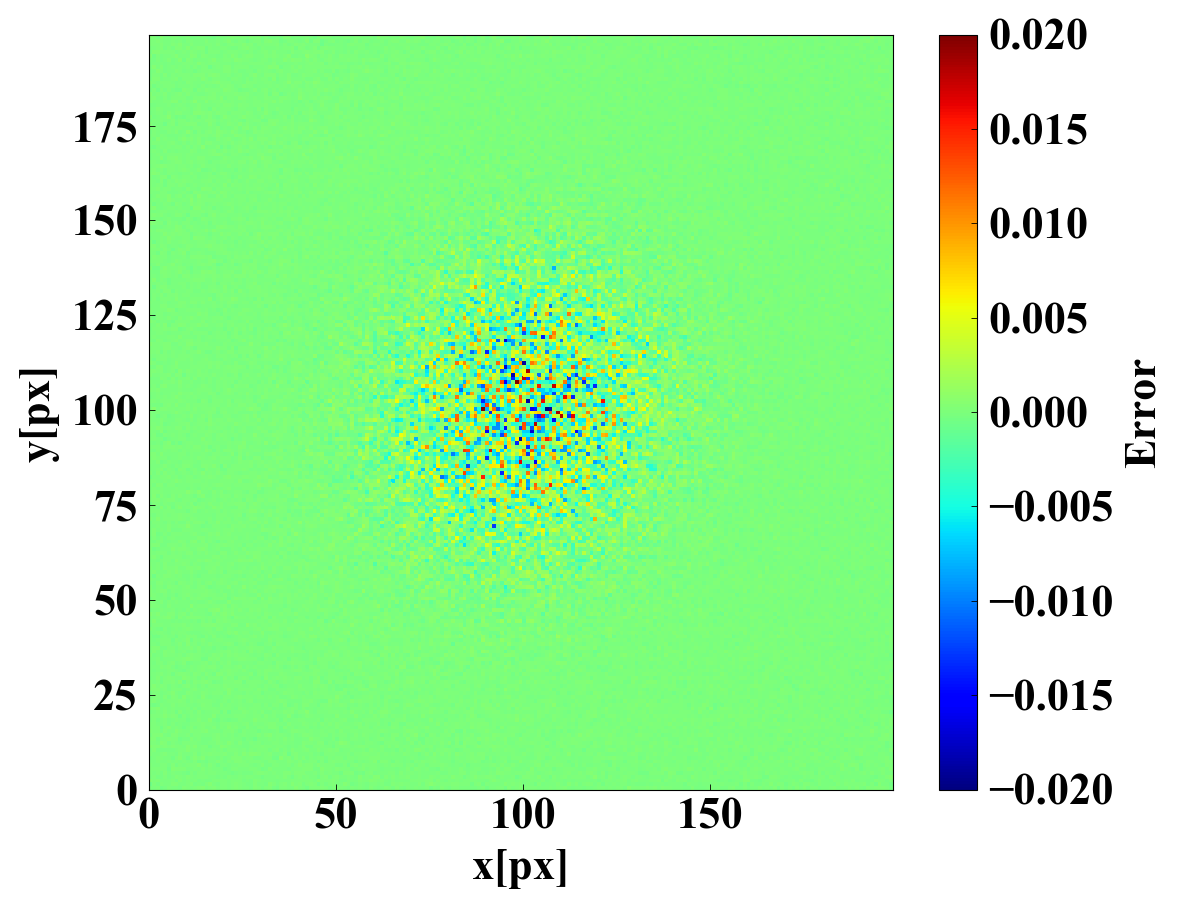

保存ファイル名： 2020-12-10_14-43_jet_noise-norm.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/Create_gaussian/2020-12-10_14-43_jet_noise-norm.png


In [27]:
#加算したノイズの表示
NOISE_norm = NOISE_norm.reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_jet_noise-norm.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, NOISE_norm, cmap='jet', vmin=-0.02, vmax=0.02)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [20]:
idx_fit

(99, 100)

In [15]:
error.shape

(200, 200)

In [18]:
NOISE.shape

(40000,)